# Linear Regression

In [80]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# 1. Dataset

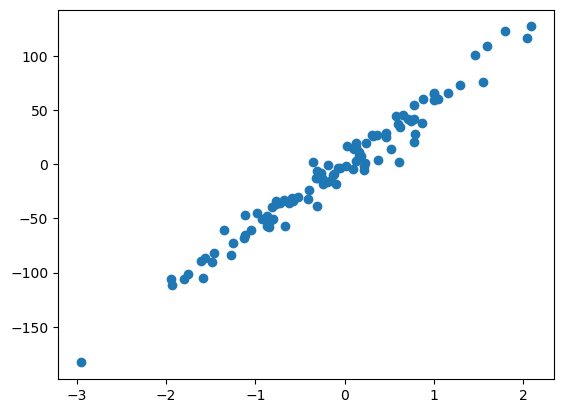

In [81]:
x,y = make_regression(n_samples = 100 , n_features = 1 , noise = 10)
plt.scatter(x,y)

In [82]:
y = y.reshape(y.shape[0],1)
#dimensions verification
print(x.shape,y.shape)

(100, 1) (100, 1)


In [83]:
X = np.hstack((x, np.ones(x.shape)))
#dimensions verification
print(X.shape)

(100, 2)


In [84]:
theta = np.random.randn(2,1)
#dimensions verification
print(theta.shape)

(2, 1)


# 2. Model

In [85]:
def model(X,theta):
    return X.dot(theta)

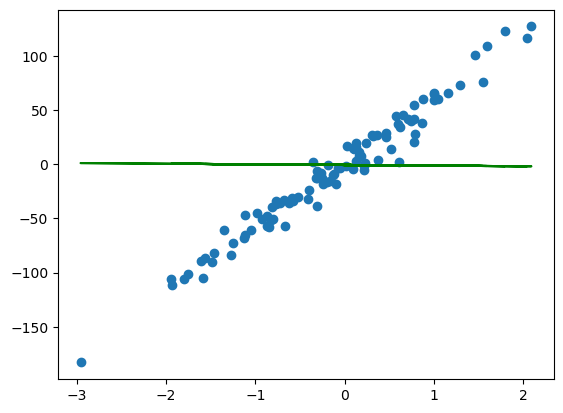

In [108]:
plt.plot(x,model(X,theta),c='g')
plt.scatter(x,y)

# 3. Cost Function

In [87]:
def cost_function(X , theta , y) :
    m = len(y)
    return (1 / (2 * m)) * np.sum((model(X , theta) - y) ** 2)

In [88]:
cost_function(X , theta , y)

1594.6192894227227

# 4. Gradient Descent

In [92]:
def grad(X, y, theta):
    m = len(y)
    return (1 / m) * (X.T.dot(model(X, theta) - y))
print(theta.shape)  

(2, 1)


In [130]:
def gradient_descent(X, y, theta, l_rate, n):
    cost_history = np.zeros(n)
    for i in range(n):
        theta = theta - l_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X , theta , y)
    return theta , cost_history

In [131]:
theta_final , cost_history = gradient_descent(X, y, theta, l_rate=0.01, n=1000)
print(theta_final.shape)  

(2, 1)


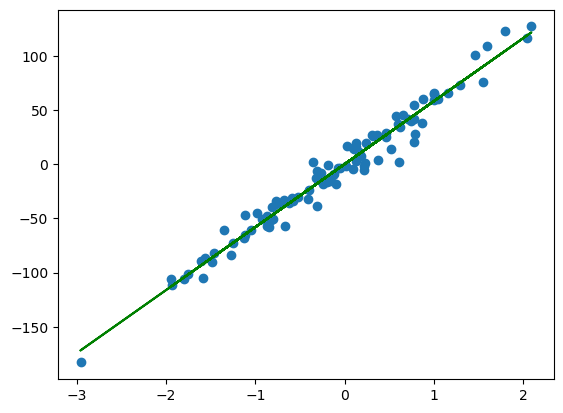

In [128]:
plt.scatter(x,y)
predection = model(X,theta_final) 
plt.plot(x,predection,c='g')

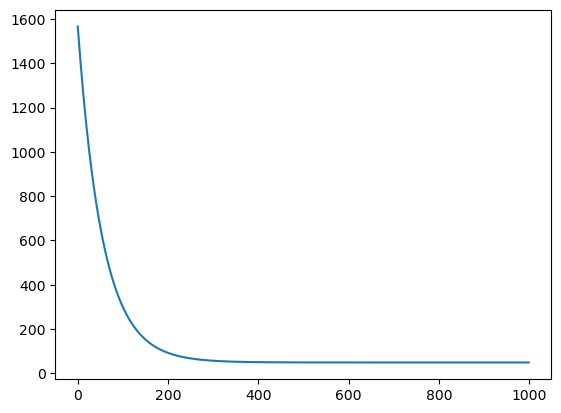

In [129]:
plt.plot(range(1000),cost_history)

In [136]:
def determination_coef(y , pred) :
    u = ((y - pred) ** 2).sum()
    v = ((y - y.mean()) ** 2).sum()
    return 1 - (u / v)

In [137]:
determination_coef(y , predection)

0.9682569324232461